<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start


In [81]:
!pip install -q yfinance
!pip install -q hurst
!pip install -q nolds

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from nolds import corr_dim, hurst_rs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


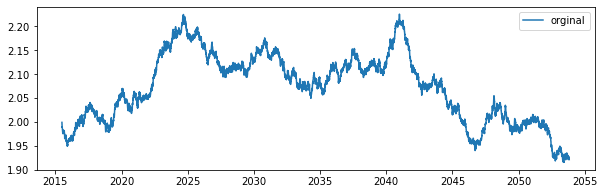

In [83]:
N = 9999
scalar = 10

t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
raw_x = np.cumprod(random_changes)*2  # create a random walk from random changes
x = pd.Series(raw_x, index=t)

# pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

# print(pp[0])

# Zad 1
Wersja biblioteczna

In [84]:
x.describe()

count    9999.000000
mean        2.072537
std         0.070961
min         1.915315
25%         2.008463
50%         2.079830
75%         2.124885
max         2.225527
dtype: float64

In [85]:
print(kurtosis(x))

-0.9104920466304485


# Zad 2

In [86]:
E = entropy(x)
print(E)

9.209653249957485


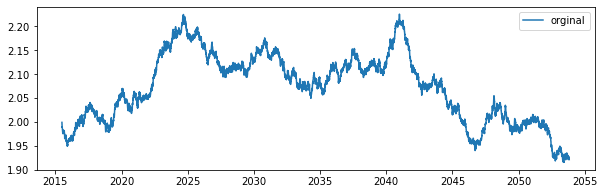

In [87]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [88]:
print(hurst.compute_Hc(x)[0])

0.5391564892383756


In [89]:
print(corr_dim(x, 1))

0.9366242133943719


# Zad 3


In [90]:
# Szerokosc okna 
h = 100

Dla zadania 1


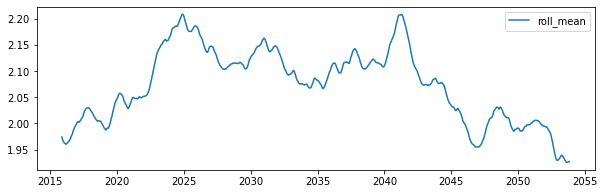

In [91]:
roll_mean = x.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

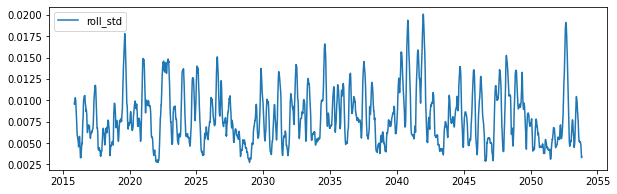

In [92]:
roll_std = x.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

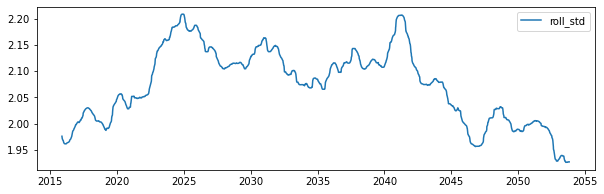

In [93]:
roll_median = x.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

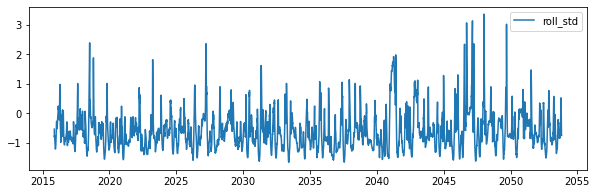

In [94]:
roll_kurtosis = x.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [95]:
def entopy_base_2(data):
    return entropy(data)

In [96]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

In [97]:
def fractal_dim(data):
    return corr_dim(data, 1)

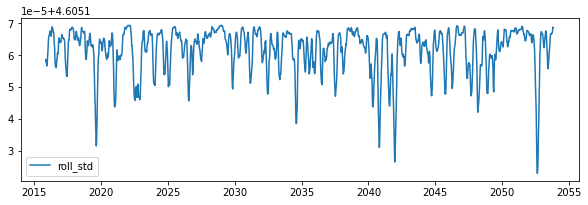

In [98]:
roll_entropy = x.rolling(h).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

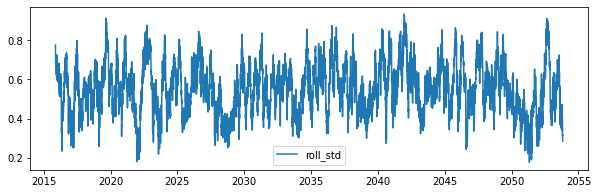

In [99]:
roll_hurst = x.rolling(h).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

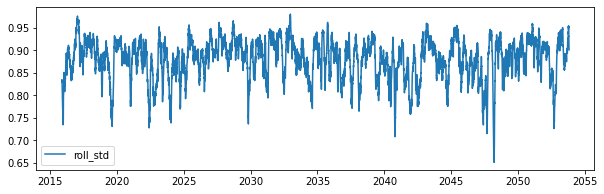

In [100]:
roll_fractal = x.rolling(h).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()

# Zad 4

Normalized


In [101]:
raw_x = raw_x.reshape(-1, 1)
normalized = normalize(raw_x, norm='l2')
# print(normalized)
# print(raw_x)

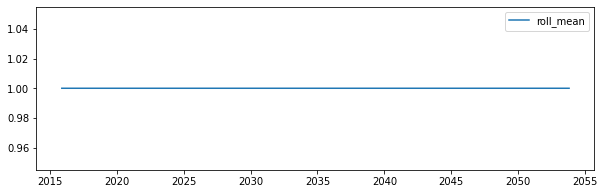

In [102]:
normalized = pd.DataFrame(normalized)

roll_mean = normalized.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

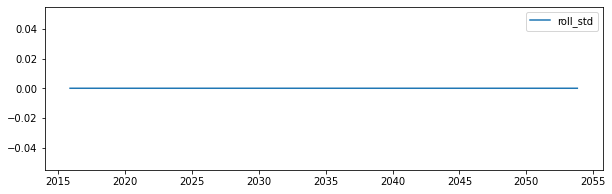

In [103]:
roll_std = normalized.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

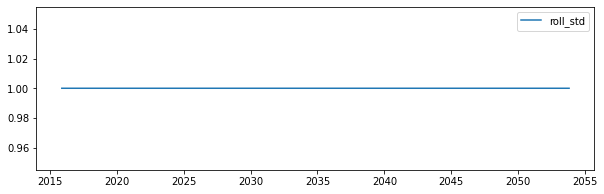

In [104]:
roll_median = normalized.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/window/rolling.py:1342: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)


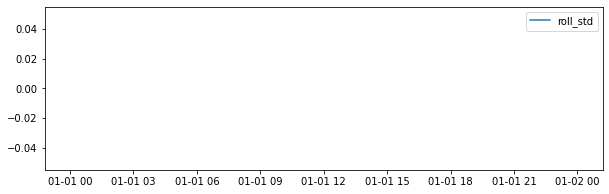

In [105]:
roll_kurtosis = normalized.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

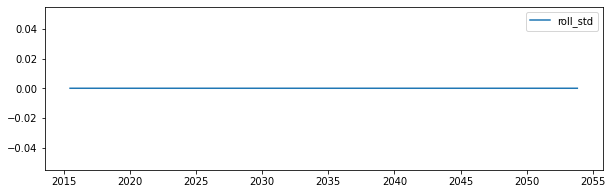

In [106]:
roll_entropy = normalized.rolling(1).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

Scaled


In [107]:
scaler = StandardScaler()
raw_x = raw_x.reshape(-1, 1)
stand = scaler.fit_transform(raw_x)

stand = pd.DataFrame(stand)

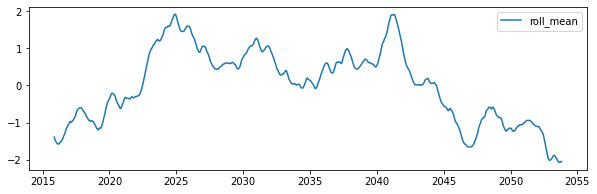

In [108]:
roll_mean = stand.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

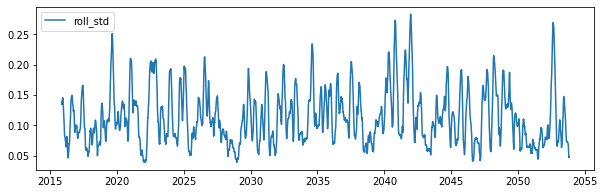

In [109]:
roll_std = stand.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

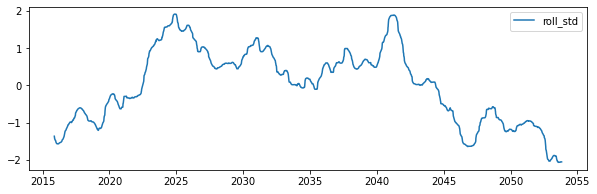

In [110]:
roll_median = stand.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

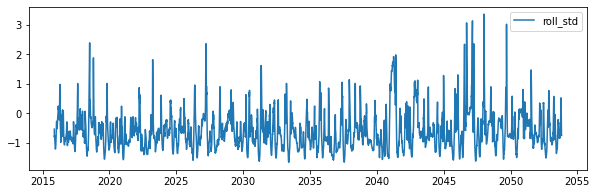

In [111]:
roll_kurtosis = stand.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

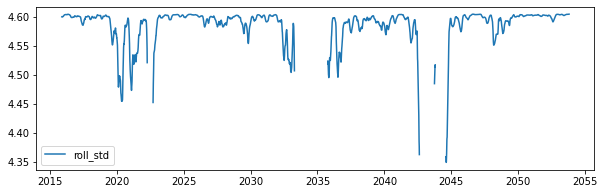

False


In [112]:
roll_entropy = stand.rolling(h).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

print(pd.DataFrame(stand).isnull().values.any())
# from IPython.display import display, HTML
# display(pd.DataFrame(stand)[6000:700])


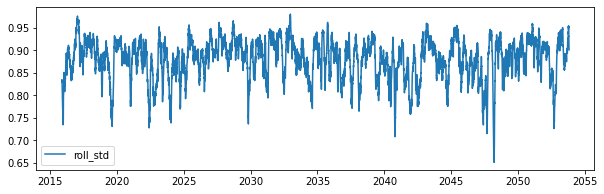

In [113]:
roll_fractal = stand.rolling(h).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()